In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

In [2]:
#Define Pauli matrices
X = np.array([[0,1], [1,0]])
Y = np.array([[0,-1j], [1j,0]])
Z = np.array([[1,0], [0,-1]])

#Define initial state, Lindblad operator, Hamiltonian
rho_i = (1/2)*np.array([[1,1], [1,1]],dtype=complex)
L_z = Z
# H = np.zeros((2,2),dtype=complex)
delta = 5e6
H = delta*Z

In [3]:
#Lindblad equation
gamma = 0.5e6
dt = 1e-9
endpt = 5e-6
time = np.linspace(0,endpt,int(endpt/dt))
drhodt = np.zeros((len(time),2,2),dtype=complex)
rho = np.zeros((len(time),2,2),dtype=complex)
Vx = np.zeros(len(time))
Vy = np.zeros(len(time))
Vz = np.zeros(len(time))

rho[0] = rho_i
Vx[0] = (np.trace(rho[0] @ X)).real
Vy[0] = (np.trace(rho[0] @ Y)).real
Vz[0] = (np.trace(rho[0] @ Z)).real

for t in range(1,len(time)):
    drhodt[t] = -1j*(H @ rho[t-1] - rho[t-1] @ H) + gamma*(Z @ rho[t-1] @ Z - rho[t-1])
    rho[t] = rho[t-1] + drhodt[t]*dt
    Vx[t] = (np.trace(rho[t] @ X)).real
    Vy[t] = (np.trace(rho[t] @ Y)).real
    Vz[t] = (np.trace(rho[t] @ Z)).real

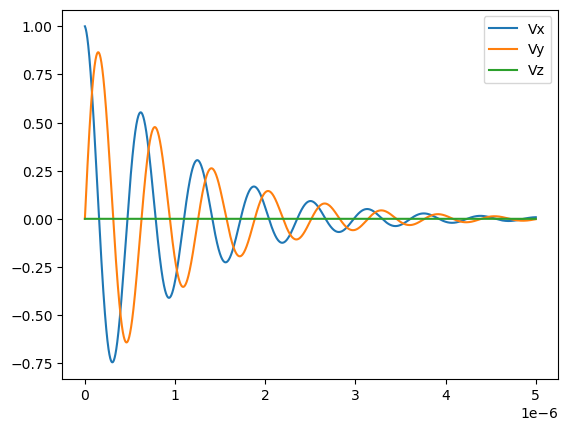

In [4]:
#Plot
plt.figure()
plt.plot(time, Vx, label='Vx')
plt.plot(time, Vy, label='Vy')
plt.plot(time, Vz, label='Vz')
plt.legend()
plt.show()